In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-restaurants-2023/restaurants.csv


# 🧾 Indian Restaurant Data Analysis 2023

Exploring cuisine types, location trends, and rating patterns in restaurants across India using Python and Pandas.


In [2]:
import os
import pandas as pd

# Check available files to get correct path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/indian-restaurants-2023/restaurants.csv


In [3]:
import pandas as pd

# Load dataset using the correct path
df = pd.read_csv("/kaggle/input/indian-restaurants-2023/restaurants.csv")

# Preview first 5 rows
df.head()


,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


In [4]:
# Overview of columns and data types
df.info()

# Basic statistical summary
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
count,6593,6593,6593,6593,6593,6593.000000,6593.000000,6593.000000
unique,4520,2399,108,23,2096,NaN,NaN,NaN
top,Wow! Momo,"Koramangala, South Bangalore",South Bangalore,Bangalore,"North Indian, Chinese",NaN,NaN,NaN
freq,67,66,364,1019,294,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.088200,119.420143,1102.798271
std,NaN,NaN,NaN,NaN,NaN,0.670031,261.849704,716.935212
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,100.000000
25%,NaN,NaN,NaN,NaN,NaN,3.900000,6.000000,500.000000
50%,NaN,NaN,NaN,NaN,NaN,4.200000,31.000000,900.000000
75%,NaN,NaN,NaN,NaN,NaN,4.400000,115.000000,1500.000000


## 📌 Summary So Far

- The dataset contains restaurant details like name, location, type, cuisine, and ratings.
- We explored the basic structure using `info()` and `describe()`.
- Next steps: Clean missing values, visualize rating distribution, and explore cuisine trends.


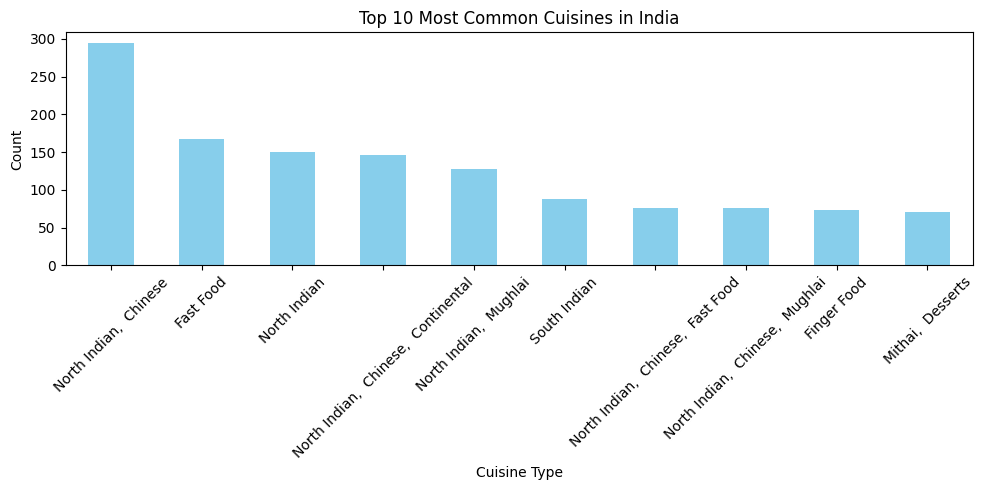

In [5]:
import matplotlib.pyplot as plt

# Plot top 10 most common cuisines
df['Cuisine'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Most Common Cuisines in India')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Cuisine Distribution Insight

The bar chart above shows the most common cuisines across Indian restaurants. North Indian and Chinese cuisines dominate the scene, with a significant presence of South Indian and Continental options as well.


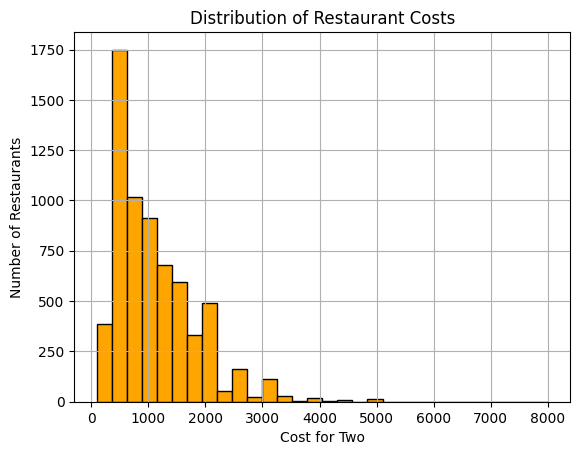

In [6]:
# Histogram of restaurant cost distribution
df['Cost'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()


## 💰 Cost Insights

Most restaurants fall in the affordable-to-mid range. A few premium outliers exist, which might skew analysis — we'll handle them in the next phase of this project.


## 🧾 Conclusion & Next Steps

This notebook performed a basic EDA on a rich dataset of Indian restaurants. We explored the structure, popular cuisines, and cost distribution. In the future, we plan to:
- Analyze ratings vs. cost
- Explore city-wise cuisine preferences
- Handle outliers and missing values (if any)

Stay tuned for Part 2! 🚀


🧹 Missing Value Treatment
We first inspect and clean missing values to avoid errors in our plots.

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/indian-restaurants-2023/restaurants.csv')


In [8]:
# Check missing values
df.isnull().sum()

# Optional: Fill or drop missing data
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)


⭐ Rating Distribution
Let’s visualize how ratings are distributed among restaurants.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


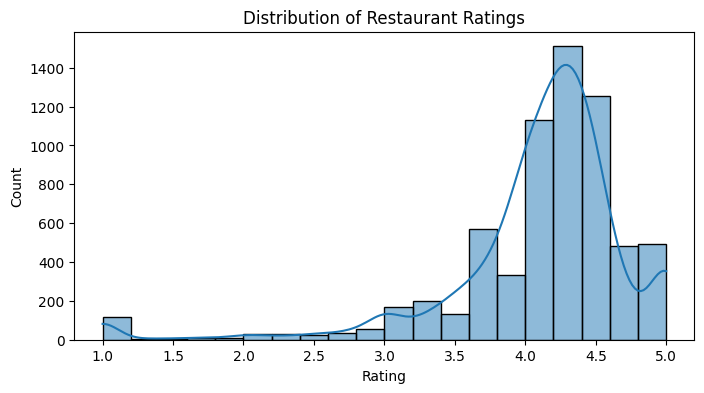

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


🍽️ Cuisine Trends
Which cuisines are most common? Let’s find out!

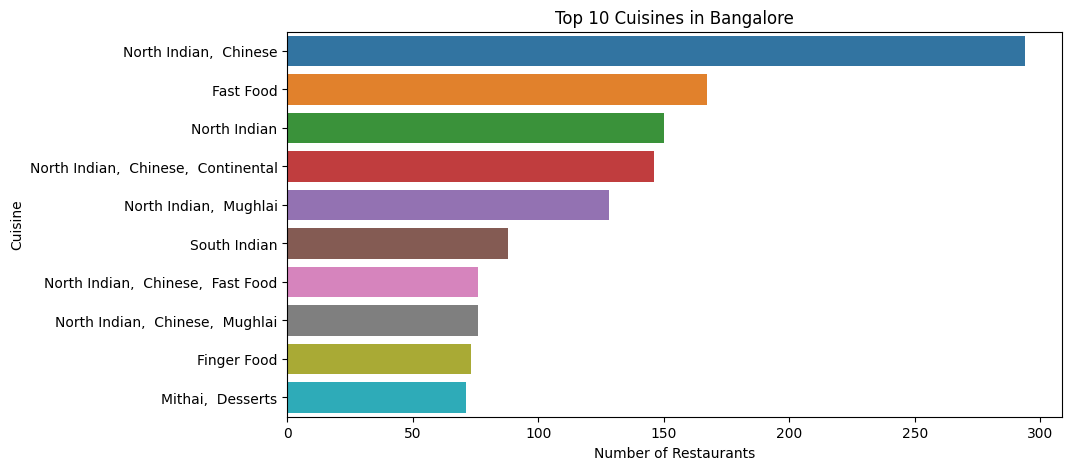

In [10]:
# Top 10 Cuisines
top_cuisines = df['Cuisine'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


💵 Do Expensive Restaurants Get More Votes?
We’ll compare restaurant cost with number of votes.

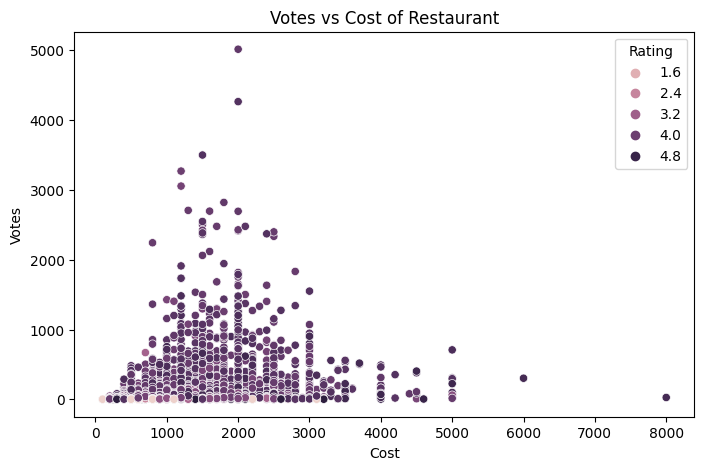

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Cost', y='Votes', hue='Rating')
plt.title('Votes vs Cost of Restaurant')
plt.show()
